#**CUSTOMER SEGMENTATION PROJECT**

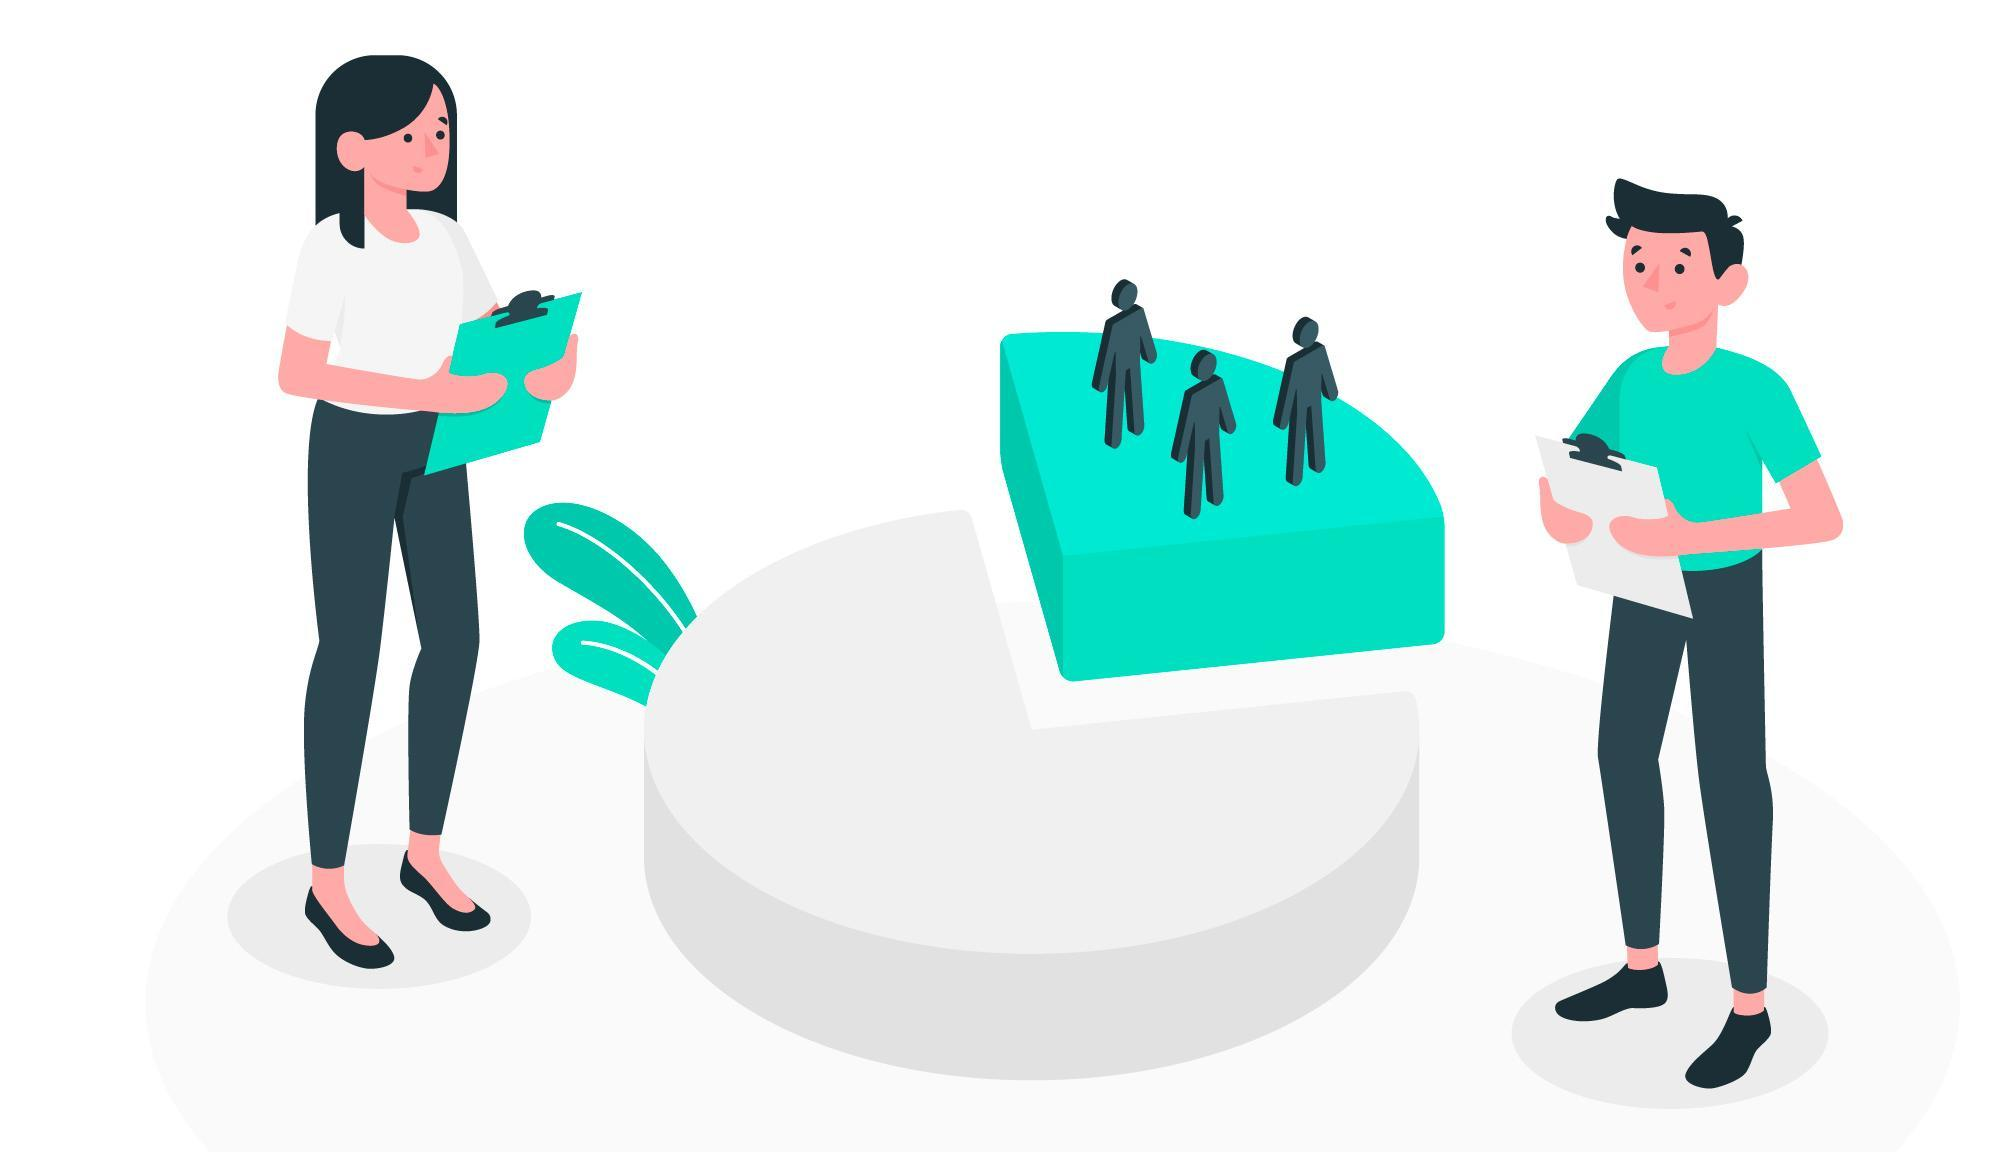

#**About Dataset**

**Problem Statement**

Customers segmentation involves categorizing Customers based on specific attributes. Customers Segmentation Analysis comprehensively examines an organization's ideal Customers base to enhance its understanding and enable product customization to address the different requirements, behavior patterns, and concerns of varied Customers segments.

By using Customers Segmentation Analysis, a business can refine its product offering to suit its target Customers across diverse segments. Instead of spending resources on broad product promotion to all Customers in the database, a company can identify the Customers segment most likely to engage with the product and focus marketing efforts exclusively on that specific segment. This approach enables companies to allocate their resources more efficiently by directing their marketing efforts towards the most receptive Customers segments, resulting in higher conversion rates and better returns on investment.

* Customers segmentation encompasses various methodologies based on four key
parameters: geographic, demographic, behavioral, and psychological factors.

* Geographic segmentation involves user location, allowing for categorization by country, state, city, or zip code.

* Demographic segmentation pertains to Customers characteristics such as gender, parental status, and other survey-derived data related to structure, size, and movements of Customers over space and time.

* Behavioral segmentation relies on observed Customers behaviors to predict future actions, including past purchasing patterns and high activity moments.

* Psychological segmentation delves into Customers personality traits, attitudes, and beliefs, obtained through surveys to gauge Customers sentiment.

Implementing Customers segmentation presents multiple business advantages, enabling optimization in budgeting, product design, promotion, marketing, and Customers satisfaction. This approach targets Customers of the highest potential value, optimizes product offerings, and tailors marketing strategies, ultimately leading to improved Customers satisfaction.

In the upcoming section, we will delve into the fetures of the data.

**Features**

1. **People**

ID: Customers's unique identifier

Year_Birth: Customers's birth year

Education: Customers's education level

Marital_Status: Customers's marital status

Income: Customers's yearly household income

Kidhome: Number of children in Customers's household

Teenhome: Number of teenagers in Customers's household

Dt_Customers: Date of Customers's enrollment with the company

Recency: Number of days since Customers's last purchase

Complain: 1 if Customers complained in the last 2 years, 0 otherwise


2. **Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

3. **Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if Customers accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if Customers accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if Customers accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if Customers accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if Customers accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if Customers accepted the offer in the last campaign, 0 otherwise

4. **Place**

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month


5. **Target**

Need to perform clustering to summarize Customers segments.

6. **Dataset**

The customer data was sourced from Kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [109]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime
from datetime import date
import datapurifier as dp
from datapurifier import Mleda, Nlpeda, Nlpurifier, MlReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##**Importing our data.**

In [110]:
data=pd.read_csv('/content/marketing_campaign.csv',header=0,sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [112]:
data.shape

(2240, 29)

##**Performing EDA**

In [113]:
report = Mleda(data)
report

Shape of DataFrame:  (2240, 29)

Sample of Dataframe:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1704,7349,1973,Basic,Together,9722.0,1,0,02-10-2012,7,6,17,16,6,16,42,4,3,1,3,8,0,0,0,0,0,0,3,11,1
246,2176,1972,Graduation,Married,80134.0,1,0,20-05-2013,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1
2109,3104,1961,Graduation,Single,82332.0,0,0,17-09-2012,89,830,59,968,51,79,19,1,5,3,12,2,0,0,1,0,0,0,3,11,1
1081,247,1971,Graduation,Married,36715.0,1,0,17-11-2012,16,172,10,125,21,13,16,6,7,2,4,9,0,0,0,0,0,0,3,11,1
1092,4944,1959,Graduation,Together,71367.0,0,0,23-08-2013,24,227,23,389,42,21,75,1,4,5,7,2,0,0,0,0,0,0,3,11,0
832,3321,1967,PhD,Together,56575.0,0,2,05-05-2013,42,421,5,90,0,16,10,3,7,3,7,5,0,0,0,0,0,0,3,11,0
579,5253,1956,Master,Together,54603.0,1,1,09-07-2013,85,145,13,46,17,2,4,6,4,2,4,7,0,0,0,0,0,0,3,11,0
2002,4023,1970,Graduation,Married,22979.0,1,0,06-09-2012,29,16,17,19,20,21,22,3,3,2,2,8,0,0,0,0,0,0,3,11,1
816,2986,1976,Graduation,Married,30772.0,1,1,12-03-2014,89,7,2,4,2,1,4,1,1,0,2,6,0,0,0,0,0,0,3,11,0
442,5029,1946,Graduation,Married,18100.0,0,0,06-08-2013,14,3,1,2,4,3,1,1,0,0,3,5,0,0,0,0,0,0,3,11,0



There are total 3 categorical and 26 numerical columns

Description of Data:



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeals

None


Null Information of Dataframe: 


There are total 1 columns having null values out of 29 columns in dataframe



,column_name,null_rows,null_percentage
0,Income,24,1.071429


In [114]:
# Dropping columns because they will not contribute anything in model building

data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [115]:
data.shape

(2240, 27)

In [116]:
# Checking number of unique categories present in the "Marital_Status"

data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [117]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [118]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
relationship,1444
Single,796


In the above cell we are grouping 'Married', 'Together' as "relationship"

Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [119]:
data.shape

(2240, 27)

In [120]:
# Combining different dataframe columns into a single column to reduce the number of dimensions

data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [121]:
data.shape

(2240, 31)

In [122]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)
data.shape

(2240, 12)

In [123]:
# Adding a column "Age" in the dataframe

data['Age'] = 2021 - data["Year_Birth"]
data.shape

(2240, 13)

In [124]:
data['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [125]:
# Changing category into UG(Undergraduate) and PG(Postgraduate) only

data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
data['Education'] = data['Education'].replace(['Basic'], 'UG')
data.shape

(2240, 13)

In [126]:
# Number of days a Customers was engaged with company

# Changing Dt_Customers into timestamp format
data['Dt_Customers'] = pd.to_datetime(data.Dt_Customers, format='%d-%m-%Y') # Specify the correct format for day-month-year
data['first_day'] = '01-01-2015'
data['first_day'] = pd.to_datetime(data.first_day)
data['day_engaged'] = (data['first_day'] - data['Dt_Customers']).dt.days
data.shape

(2240, 15)

In [132]:
data = data.drop(columns=["ID", "Dt_Customers", "first_day", "Year_Birth", "Recency", "Complain"],axis=1)
data.shape

(2240, 9)

In [133]:
report = MlReport(data)
report


Sample of Dataframe:


,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
32,PG,relationship,40548.0,1,120,1,9,51,813
2018,PG,Single,22263.0,2,21,0,6,70,277
1514,PG,relationship,20981.0,0,73,1,7,44,611
1683,PG,relationship,23536.0,1,10,0,4,38,211
1721,PG,relationship,92491.0,0,2034,4,25,38,610
1397,PG,Single,26759.0,1,59,0,8,49,328
914,PG,Single,95529.0,0,1990,2,18,27,759
2179,PG,relationship,38946.0,1,257,0,12,66,434
847,PG,Single,55284.0,1,764,0,23,65,738
185,PG,relationship,25271.0,1,50,0,5,38,757


Shape of DataFrame:  (2240, 9)

Categorical columns: ['Education', 'Marital_Status']

Numerical columns: ['Income', 'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', 'day_engaged']

There are total 2 categorical and 7 numerical columns

Uniquess information of Dataset:



,column,unique_count,unique_percent
0,Education,2,0.089286
1,Marital_Status,2,0.089286
2,Income,1974,88.125000
3,Kids,4,0.178571
4,Expenses,1054,47.053571
5,TotalAcceptedCmp,6,0.267857
6,NumTotalPurchases,39,1.741071
7,Age,59,2.633929
8,day_engaged,663,29.598214


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,52.194196,539.582143
std,25173.076661,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,25.000000,186.000000
25%,35303.000000,0.000000,68.750000,0.000000,8.000000,44.000000,366.750000
50%,51381.500000,1.000000,396.000000,0.000000,15.000000,51.000000,541.500000
75%,68522.000000,1.000000,1045.500000,1.000000,21.000000,62.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,128.000000,885.000000



Null Information of Dataframe: 


There are total 1 columns having null values out of 9 columns in dataframe



,column_name,null_rows,null_percentage
0,Income,24,1.071429


In [134]:
# Filling the missing value in the income with the mean

data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().any()

,0
Education,False
Marital_Status,False
Income,False
Kids,False
Expenses,False
TotalAcceptedCmp,False
NumTotalPurchases,False
Age,False
day_engaged,False


In [135]:
report = MlReport(data)
report


Sample of Dataframe:


,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
666,PG,relationship,45068.0,1,20,0,4,47,595
230,PG,Single,37070.0,2,433,1,23,55,652
969,PG,relationship,44010.0,1,662,0,24,41,810
1081,PG,relationship,36715.0,1,357,1,19,50,775
527,PG,relationship,50353.0,0,442,0,15,44,207
7,PG,relationship,33454.0,1,169,0,10,36,603
1082,PG,relationship,79456.0,0,1401,1,16,65,862
1746,UG,relationship,28389.0,0,28,0,4,74,772
695,PG,relationship,61923.0,2,126,0,8,60,524
12,PG,Single,63033.0,0,1102,0,16,62,412


Shape of DataFrame:  (2240, 9)

Categorical columns: ['Education', 'Marital_Status']

Numerical columns: ['Income', 'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', 'day_engaged']

There are total 2 categorical and 7 numerical columns

Uniquess information of Dataset:



,column,unique_count,unique_percent
0,Education,2,0.089286
1,Marital_Status,2,0.089286
2,Income,1975,88.169643
3,Kids,4,0.178571
4,Expenses,1054,47.053571
5,TotalAcceptedCmp,6,0.267857
6,NumTotalPurchases,39,1.741071
7,Age,59,2.633929
8,day_engaged,663,29.598214


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,52.194196,539.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,25.000000,186.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,44.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,51.000000,541.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,62.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,128.000000,885.000000



Congrats!!, The Dataframe has NO NULL VALUES



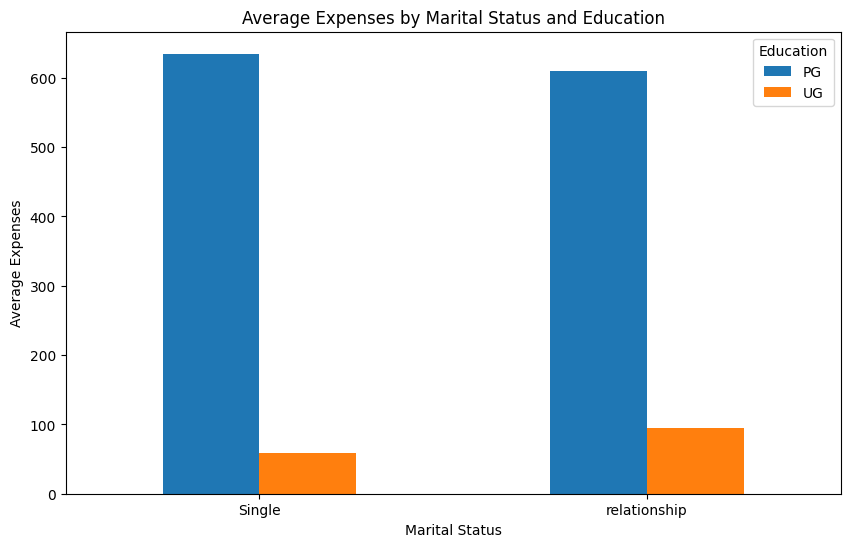

In [136]:
# Group the data by Marital_Status and Education and calculate the mean expenses
grouped_data = data.groupby(['Marital_Status', 'Education'])['Expenses'].mean().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Expenses by Marital Status and Education')
plt.xlabel('Marital Status')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.legend(title='Education')
plt.show()


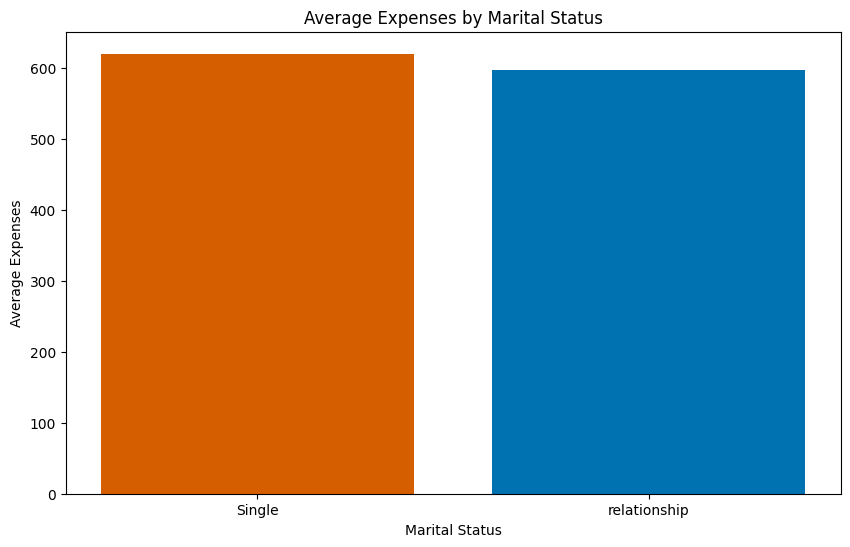

In [152]:
# Group the data by Marital_Status and calculate the mean expenses
grouped_data = data.groupby('Marital_Status')['Expenses'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color=['#D55E00', '#0072B2'])
plt.title('Average Expenses by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.show()

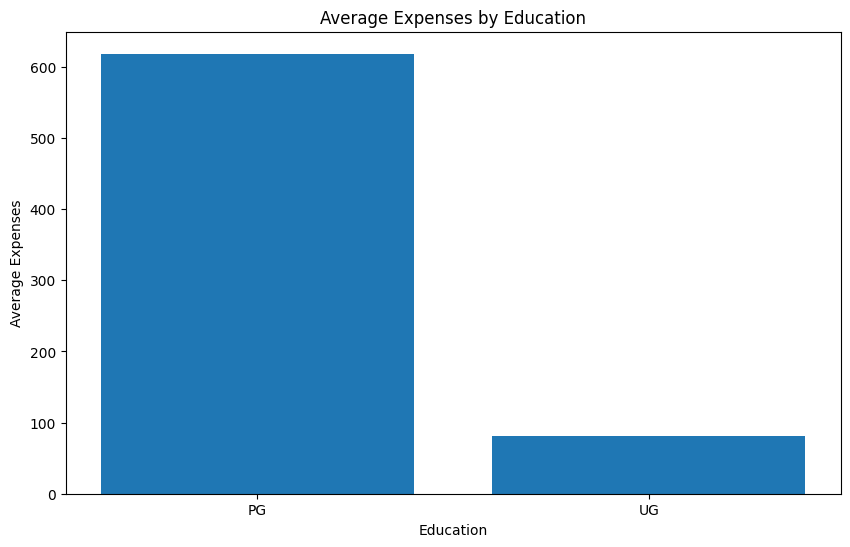

In [157]:
# Group the data by Education and calculate the mean expenses
grouped_data = data.groupby('Education')['Expenses'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Average Expenses by Education')
plt.xlabel('Education')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.show()

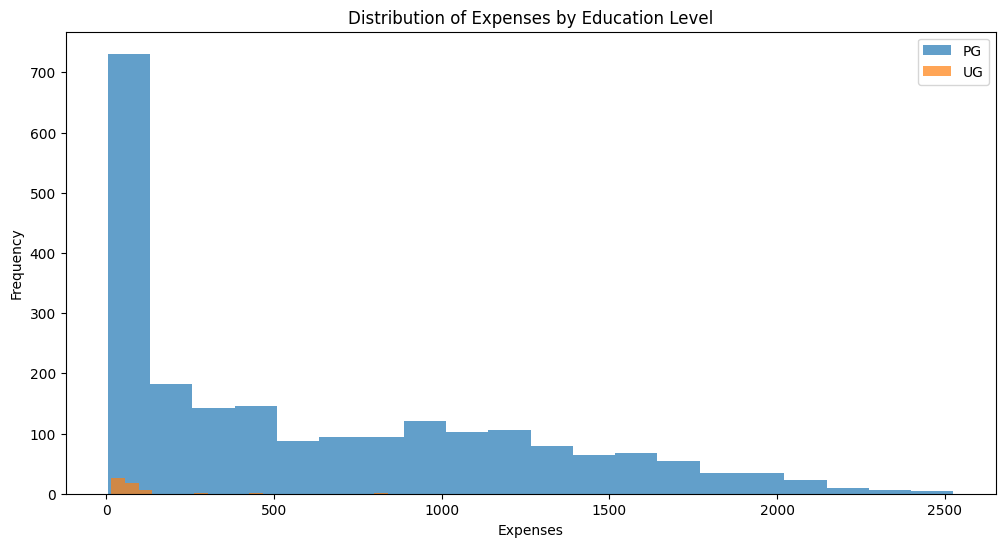

In [159]:
# Create separate histograms for each education level
plt.figure(figsize=(12, 6))

for education in data['Education'].unique():
    subset = data[data['Education'] == education]
    plt.hist(subset['Expenses'], bins=20, alpha=0.7, label=education)

plt.title('Distribution of Expenses by Education Level')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.legend()
plt.show()

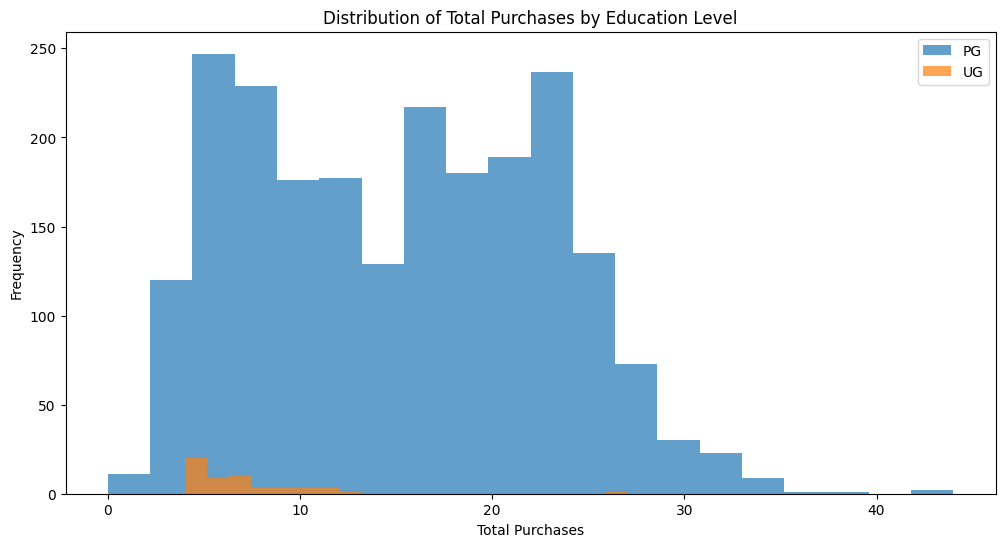

In [160]:
# Create separate histograms for each education level
plt.figure(figsize=(12, 6))

for education in data['Education'].unique():
    subset = data[data['Education'] == education]
    plt.hist(subset['NumTotalPurchases'], bins=20, alpha=0.7, label=education)

plt.title('Distribution of Total Purchases by Education Level')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

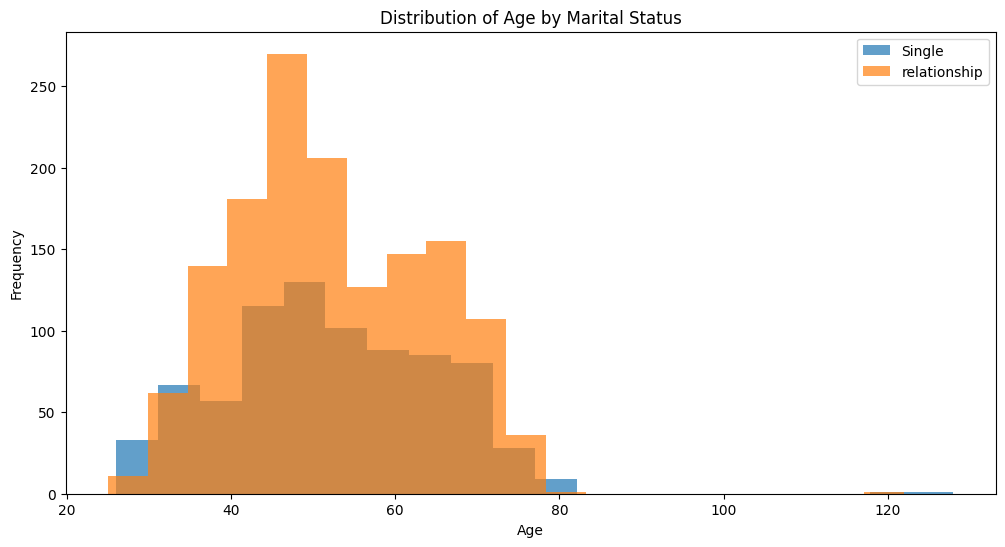

In [161]:
# Create separate histograms for each marital status
plt.figure(figsize=(12, 6))

for status in data['Marital_Status'].unique():
    subset = data[data['Marital_Status'] == status]
    plt.hist(subset['Age'], bins=20, alpha=0.7, label=status)

plt.title('Distribution of Age by Marital Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

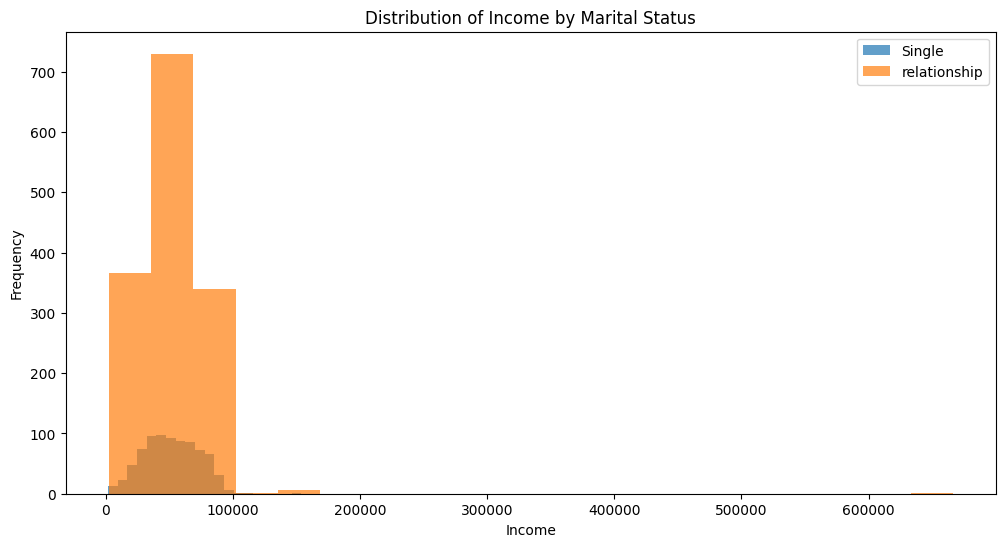

In [165]:
# Create separate histograms for each marital status
plt.figure(figsize=(12, 6))

for status in data['Marital_Status'].unique():
    subset = data[data['Marital_Status'] == status]
    plt.hist(subset['Income'], bins=20, alpha=0.7, label=status)

plt.title('Distribution of Income by Marital Status')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

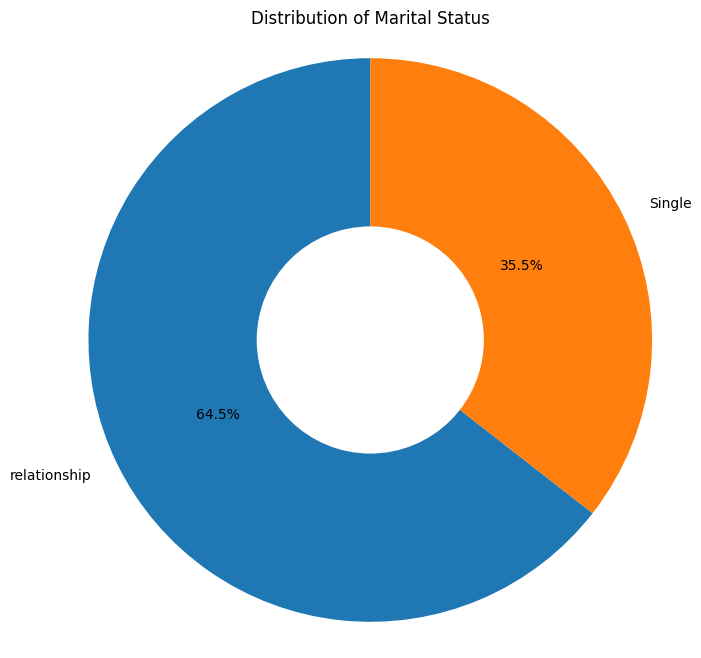

In [163]:
marital_status_counts = data['Marital_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
# Add a circle at the center to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

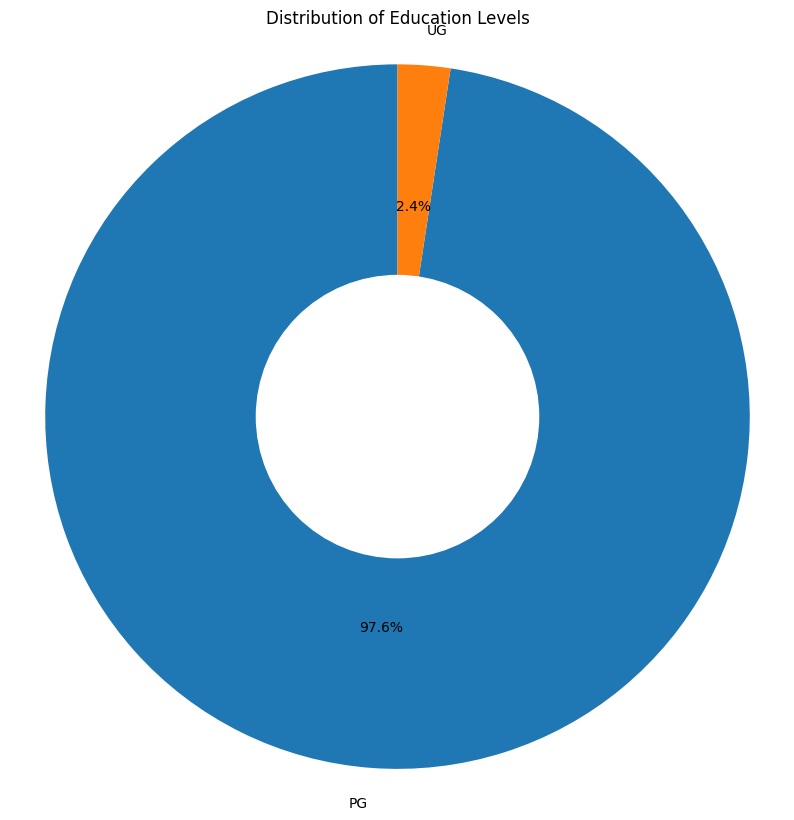

In [167]:
# Count the occurrences of each education level
education_counts = data['Education'].value_counts()

# Create the donut chart
plt.figure(figsize=(10, 10))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))
plt.title('Distribution of Education Levels')

# Add a circle at the center to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

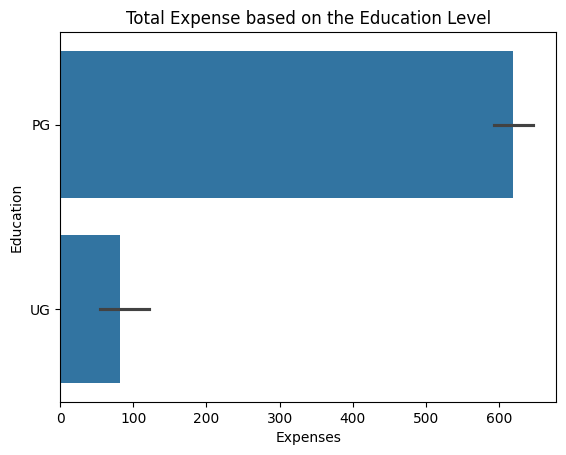

In [168]:
sns.barplot(x = data['Expenses'],y = data['Education']);
plt.title('Total Expense based on the Education Level');

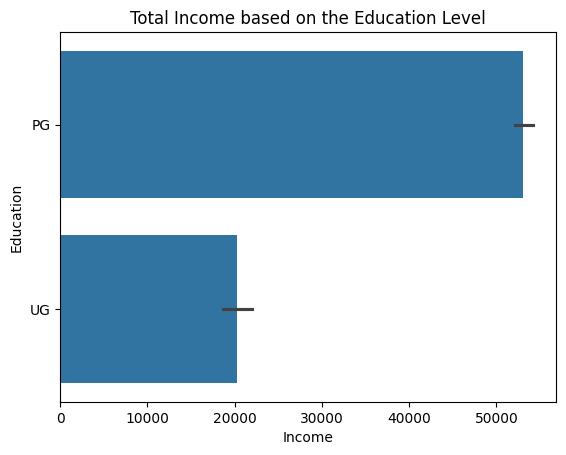

In [169]:
sns.barplot(x = data['Income'],y = data['Education']);
plt.title('Total Income based on the Education Level');

In [171]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data[['Education', 'Marital_Status']]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Calculate correlations
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending=False)[24:50:2]

NumTotalPurchases  TotalAcceptedCmp     0.258045
Kids               TotalAcceptedCmp     0.253760
NumTotalPurchases  Kids                 0.245790
                   day_engaged          0.207913
Education          Income               0.200549
Age                NumTotalPurchases    0.168304
                   Income               0.160942
Education          NumTotalPurchases    0.160612
Expenses           day_engaged          0.158814
Education          Expenses             0.136781
Age                Education            0.113564
                   Expenses             0.111306
Kids               Age                  0.090199
dtype: float64

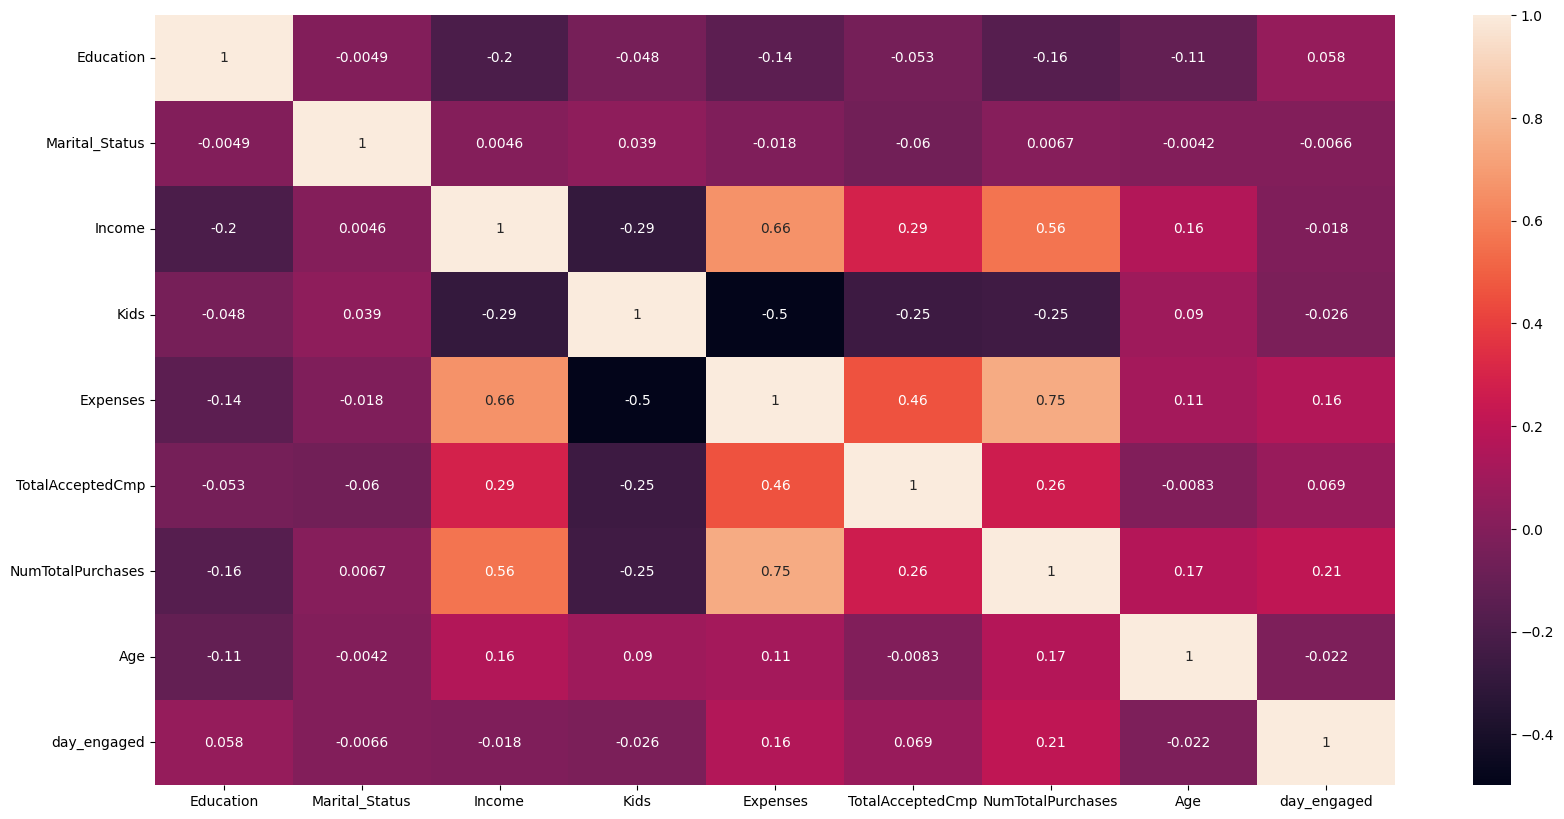

In [172]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [175]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(data.values)
scaled_features_data = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)

scaled_features_data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012


##Elbow Method

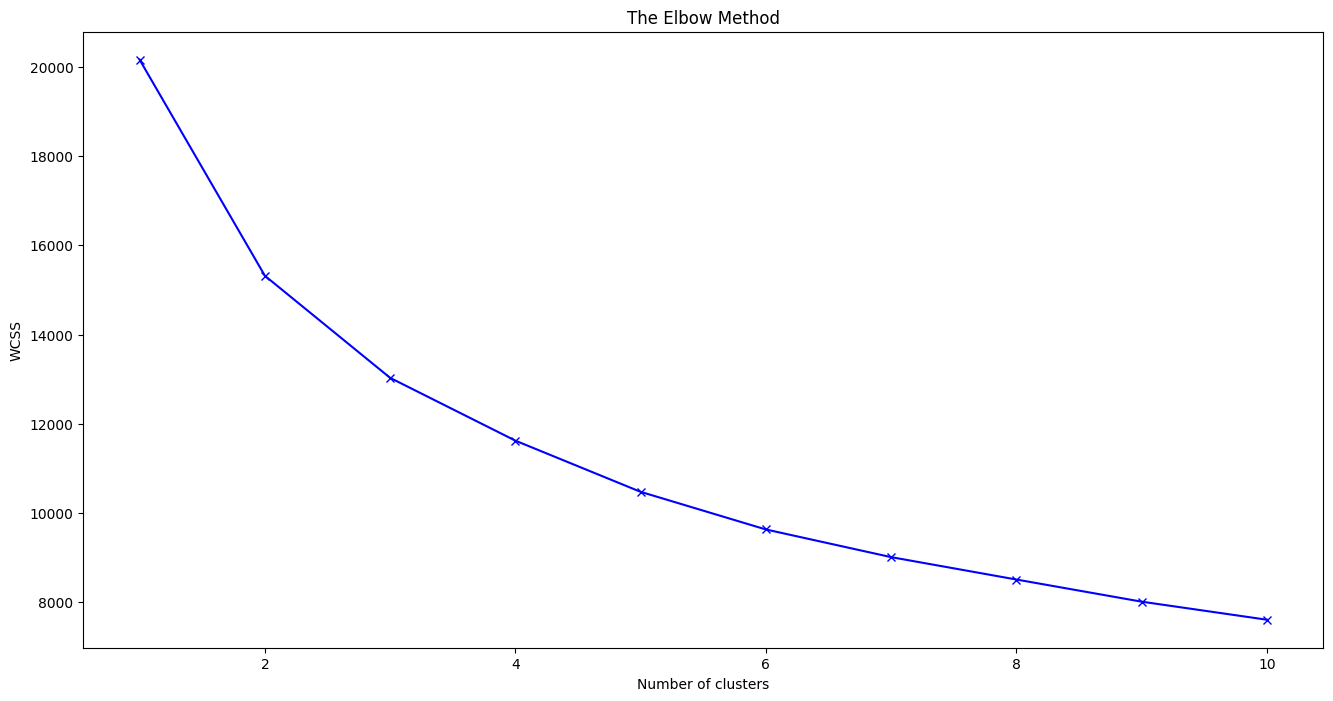

In [176]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_data)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This method does not clearly highlight the appropriate K value, so we will use the silhouette score to measure the value of K.

##Silhouette score

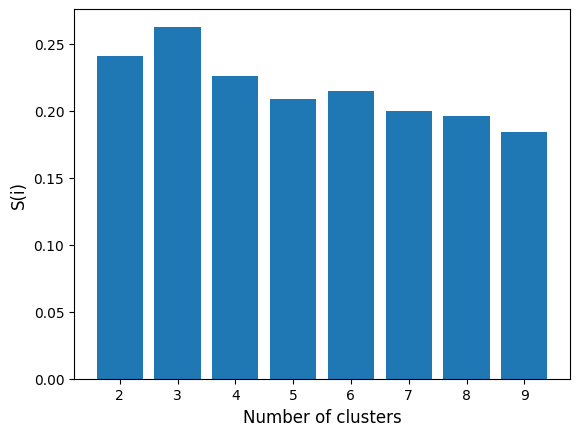

In [182]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_data)
    silhouette_scores.append(silhouette_score(scaled_features_data, m1.fit_predict(scaled_features_data)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('S(i)', fontsize = 12)
plt.show()

###Here we are using silhouette score to measure the value of K

In [183]:
silhouette_scores

[0.24115026328011627,
 0.26266881837803874,
 0.22614017820607632,
 0.20883538164050078,
 0.21442120455505384,
 0.19947880630866072,
 0.19627871532133395,
 0.1840048349667207]

In [180]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [184]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_data)
pred=kmeans.predict(scaled_features_data)


# Appending those cluster value into main dataframe

data['cluster'] = pred + 1

In [185]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,64,849,2
1,0,0,46344.0,2,27,0,6,67,299,1
2,0,1,71613.0,0,776,0,21,56,498,2
3,0,1,26646.0,1,53,0,8,37,325,1
4,0,1,58293.0,1,422,0,19,40,347,1


In [186]:
scaled_features_data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012


In [189]:
data['Education'].value_counts()

,count
Education,
0,2186
1,54


Very low undergraduate education count.

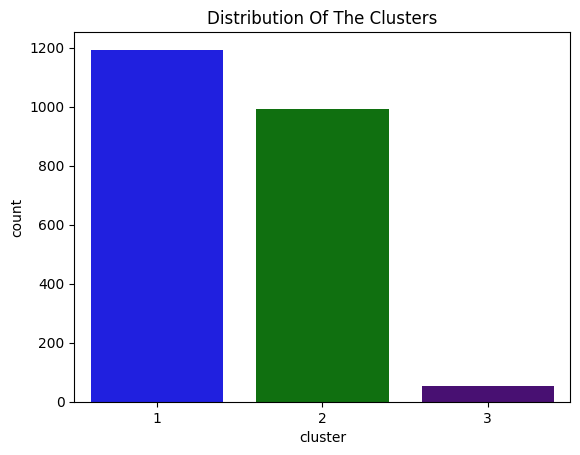

In [195]:
pl = sns.countplot(x=data["cluster"], palette=['blue', 'green', 'indigo'])
pl.set_title("Distribution Of The Clusters")
plt.show()

Note :

As we can see here cluster 1 is higher compared to others.

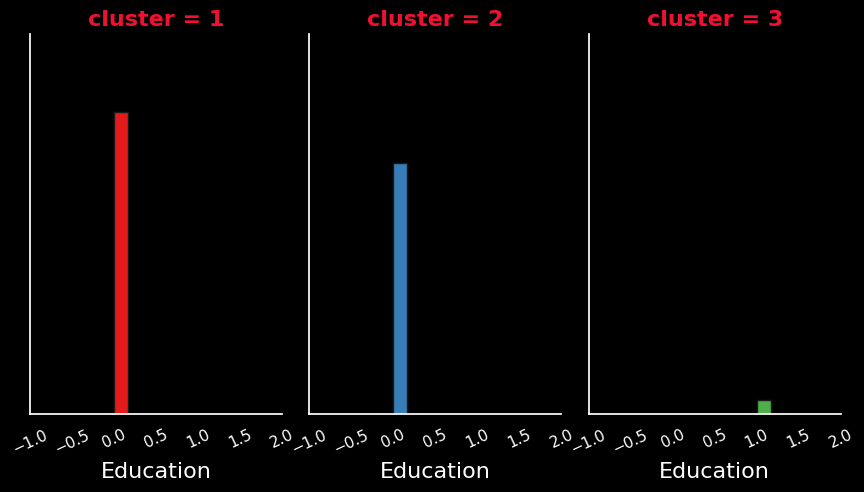

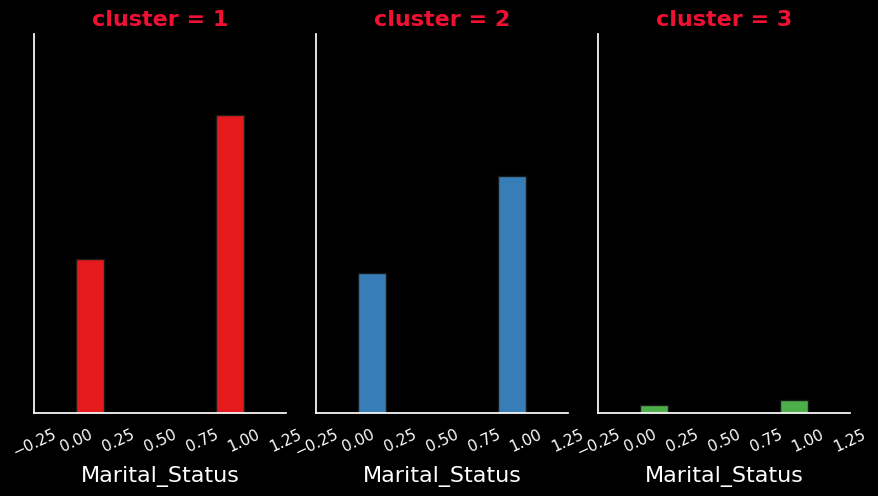

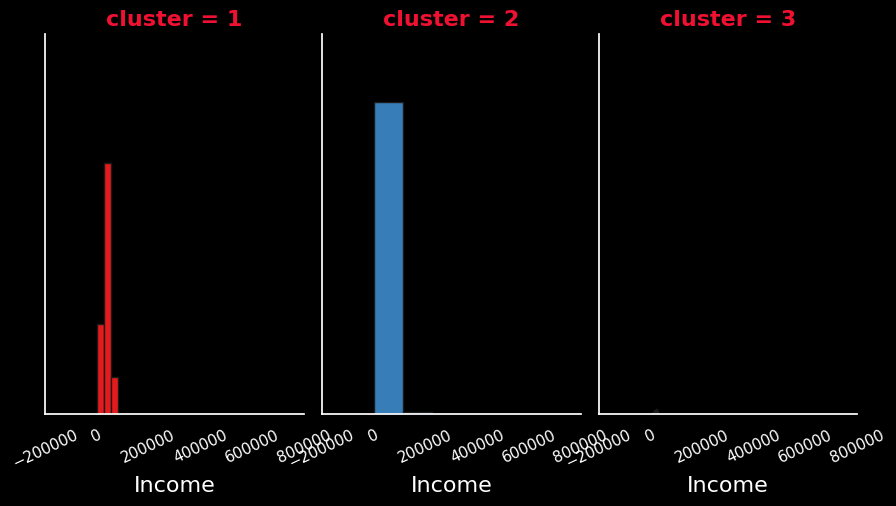

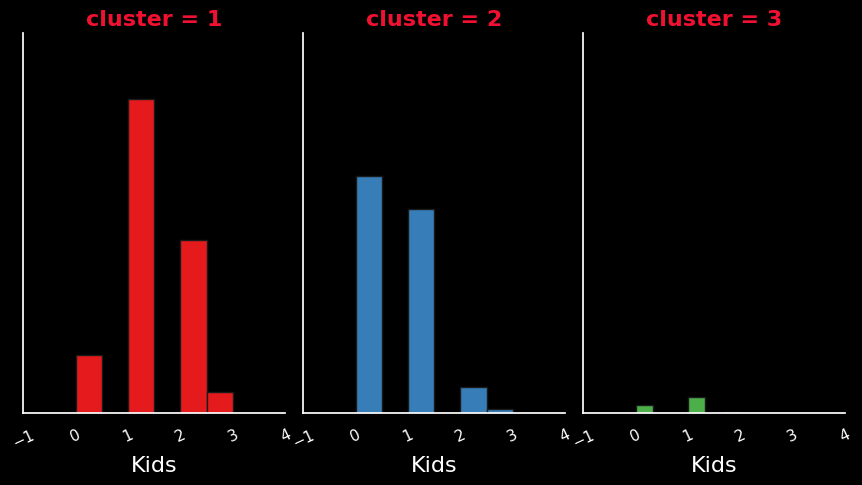

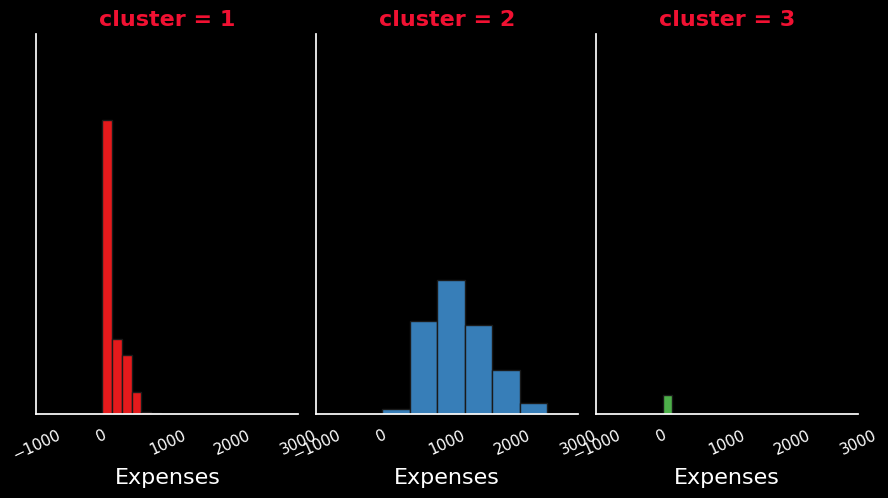

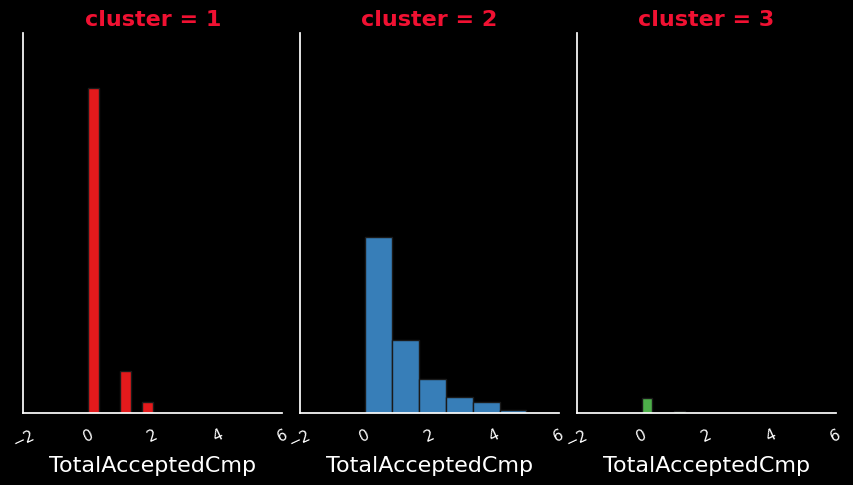

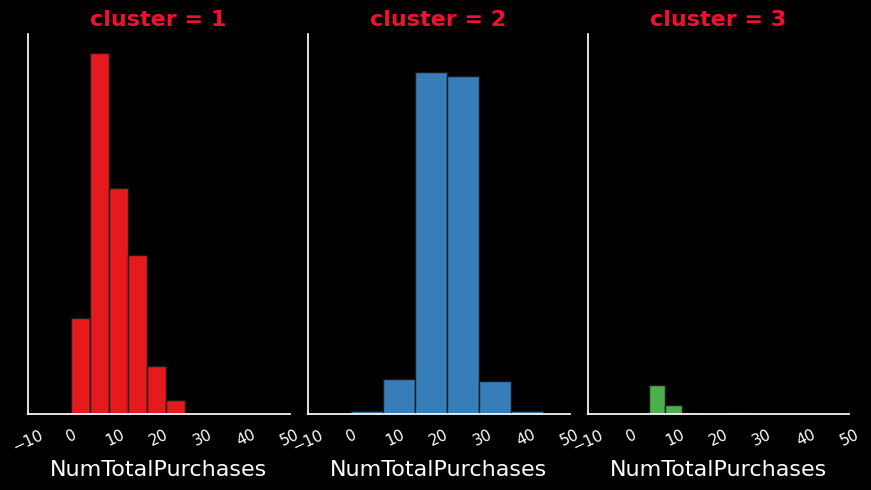

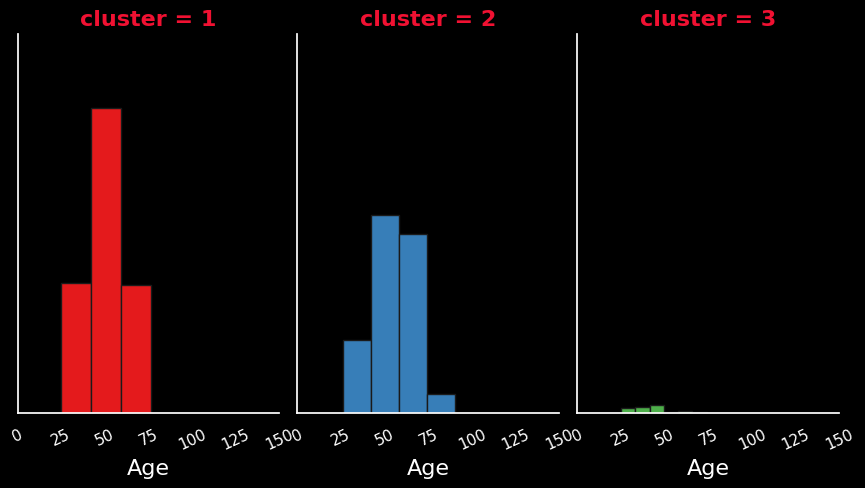

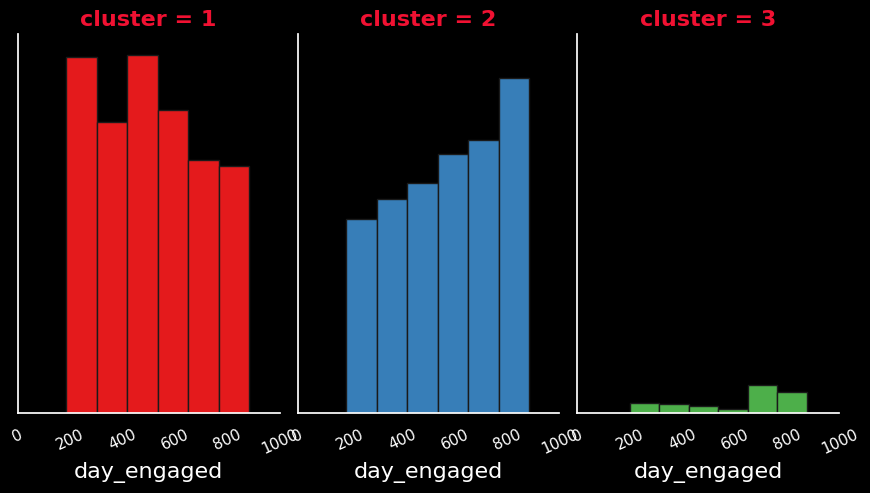

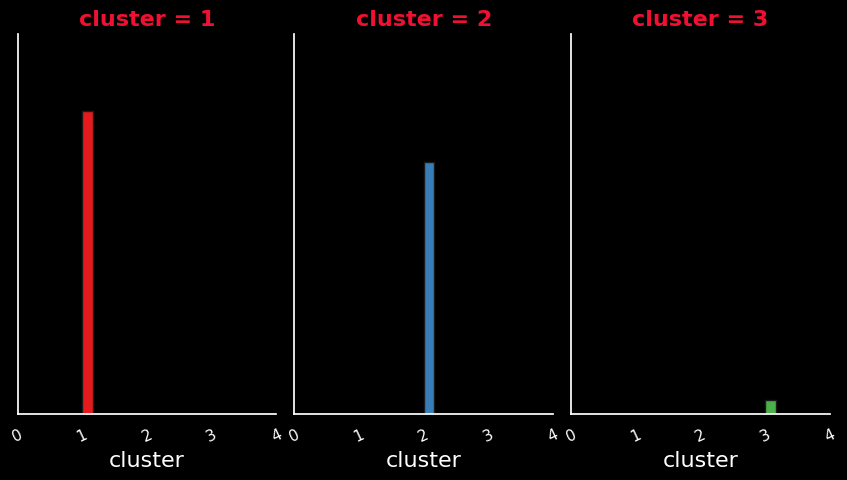

In [198]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'DejaVu Sans'})

for i in data:
    diag = sns.FacetGrid(data, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

**Report**

Based on the information provided, we can group customers into 3 categories:

1. Highly Active Customers: These customers are in the first category.
2. Moderately Active Customers: These customers fall into the second category.
3. Least Active Customers: These customers are in the third category.

**CHARACTERISTICS OF EACH CLUSTER.**


1. **Characteristics of Highly Active Customers:**

Education:

Customers with post-graduate backgrounds are the most active.

Marital Status:

These active customers are mostly in relationships, with roughly twice as many being in a relationship compared to single customers.

Income:

The highly active customers tend to have slightly lower incomes compared to moderately active customers.

Kids:

These customers tend to have more children, averaging about 1 child per customer.

Expenses:

Highly active customers spend less money compared to the moderately active ones, typically spending around 100-200 units.

Age:

The age of these customers ranges from 25 to 75, with the majority falling between 40 and 50 years old.

Engagement:

Highly active customers stay engaged with the company for longer periods of time compared to other groups.

2. **Characteristics of Moderately Active Customers:**

Education:

Moderately active customers also tend to have post-graduate backgrounds.

Marital Status:

There are slightly more customers in relationships compared to single customers in this category.

Income:

Their income is higher compared to the other customer groups.

Kids:

They have fewer children compared to highly active customers, with some not having any children.

Expenses:

Moderately active customers spend more, typically around 500-2000 units.

Age:

The age of these customers ranges from 25 to 75, with the majority falling between 35 and 60 years old.

Engagement:

They are slightly less engaged with the company compared to highly active customers.

3. **Characteristics of Least Active Customers:**

Education:

Customers with undergraduate backgrounds are the least active.

Marital Status:

There's roughly an equal number of customers in relationships and single customers in this category.

Income:

Their income is very low or negligible.

Kids:

Only a few of these customers have children.

Expenses:

Their expenses are very low or negligible.

Age:

The age of these customers ranges from 15 to 30.

Engagement:

Least active customers are not as engaged with the company for long periods of time.